In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
from scipy.optimize import curve_fit
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 设置正常显示符号
mpl.rcParams["axes.unicode_minus"] = False

In [15]:
data=pd.read_excel('SSA_nanbao.xlsx')
train_data=data[:2320]
train_data

,日期,日产油量
0,2011-04-05,17.679216
1,2011-04-06,19.565674
2,2011-04-07,20.243575
3,2011-04-08,20.600792
4,2011-04-09,20.675450
...,...,...
2315,2019-03-30,1.086111
2316,2019-03-31,0.957597
2317,2019-04-01,0.844241
2318,2019-04-02,0.772084


C:\Users\xiaoming\AppData\Local\Temp\ipykernel_32524\1609707211.py:3: RuntimeWarning: invalid value encountered in power
  return qi / ((1.0 + b * Di * t) ** (1.0 / b))


Initial production (qi): 19.693044225300234
Decline rate (Di): 0.007622961882945111
Decline exponent (b): 0.9999999999999999


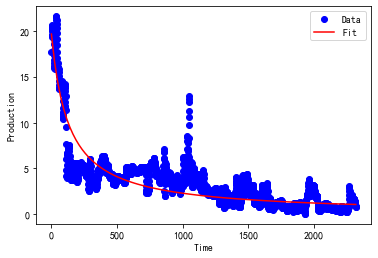

In [16]:
# 定义ARPS递减模型
def arps_model(t, qi, Di, b):
    return qi / ((1.0 + b * Di * t) ** (1.0 / b))

# 根据拟合参数绘制拟合曲线
def plot_fit(t, q, qi, Di, b):
    t_fit = np.linspace(t[0], t[-1], 100)
    q_fit = arps_model(t_fit, qi, Di, b)
    
    plt.plot(t, q, 'bo', label='Data')
    plt.plot(t_fit, q_fit, 'r-', label='Fit')
    plt.xlabel('Time')
    plt.ylabel('Production')
    plt.legend()
    plt.show()

# 输入递减曲线数据
t = np.arange(2320)  # 时间数据
q = train_data['日产油量']  # 产量数据

# 进行线性回归拟合
bounds = ([0, -np.inf, 0], [np.inf, np.inf, 1])  # 对b进行约束
popt, pcov = curve_fit(arps_model, t, q, bounds=bounds)

# 从拟合结果中获取参数值
qi, Di, b = popt

# 打印拟合结果
print(f"Initial production (qi): {qi}")
print(f"Decline rate (Di): {Di}")
print(f"Decline exponent (b): {b}")

# 绘制拟合曲线
plot_fit(t, q, qi, Di, b)

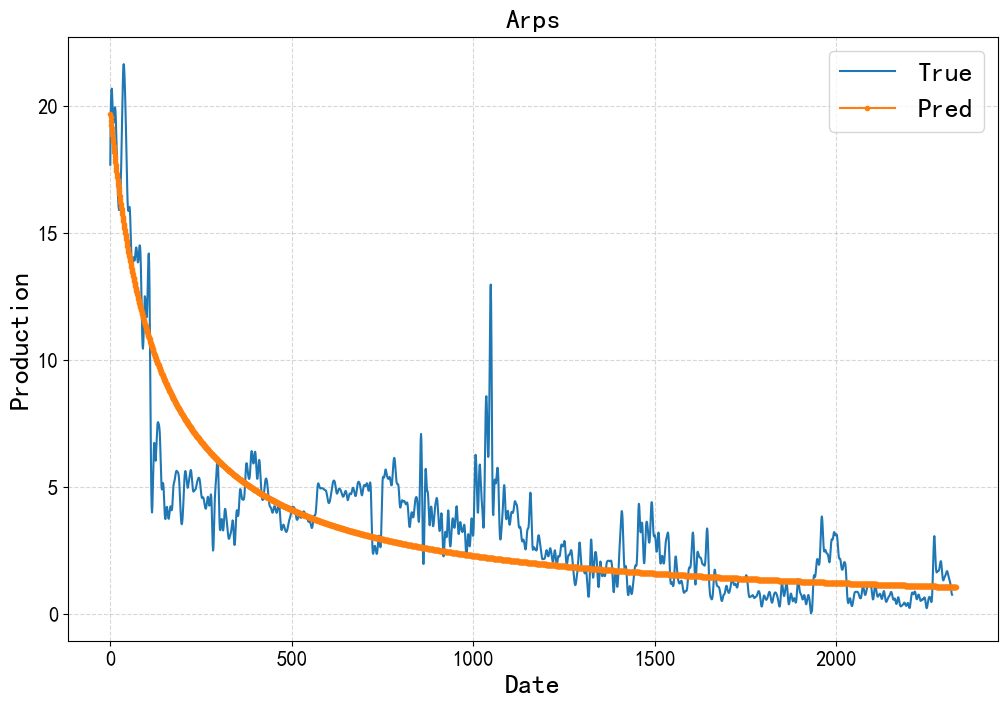

In [30]:
t = np.arange(0, 2330, 1) # 时间范围

# 计算产量
q = arps_model(t, qi, Di, b)

# 绘制Arps下降曲线
plt.figure(figsize=(12,8),dpi=100)
plt.plot(data['日产油量'][:2320],label='True')
plt.plot(q,marker='.',label='Pred')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Production',fontsize=20)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tick_params(labelsize=15)
plt.title('Arps',fontsize=20)
plt.legend(fontsize=20)
plt.savefig("acs_arps.png")
plt.show()

In [38]:
data['日产油量'][2320:2326]

2320    0.777252
2321    0.849118
2322    0.950462
2323    1.058654
2324    1.162356
2325    1.250937
Name: 日产油量, dtype: float64

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
mse=mean_squared_error(q[-7:-1],data['日产油量'][2320:2326])
mae=mean_absolute_error(q[-7:-1],data['日产油量'][2320:2326])
mape=mean_absolute_percentage_error(q[-7:-1],data['日产油量'][2320:2326])
print(mse,mae,mape)

0.029999849850810712 0.14982786210141 0.1424555515038086
